# Klasyfikacja za pomocą algorytmu wektorów wspierających (SVM)
## Materiały
Na tych ćwiczeniach zapoznamy się z zastosowaniem SVM do klasyfikacji.
Notebook bazuje na tutorialu w [Medium](https://medium.com/swlh/visualizing-svm-with-python-4b4b238a7a92).

In [1]:
import numpy as np
import matplotlib.pylab as plt

#### Importujemy dane uczące, znów iryski, ale tym razem skorzystamy do importu z biblioteki Seaborn.
Daje nam to dodatkowe wygodne narzędzia jak "drop", "pairplot", ale też zmienia format danych, jako że korzysta z frameworku 'pandas'. Nie utrudnia to znacząco życia, ale czasem wymaga dodatkowej uwagi. Będę ostrzegać :)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


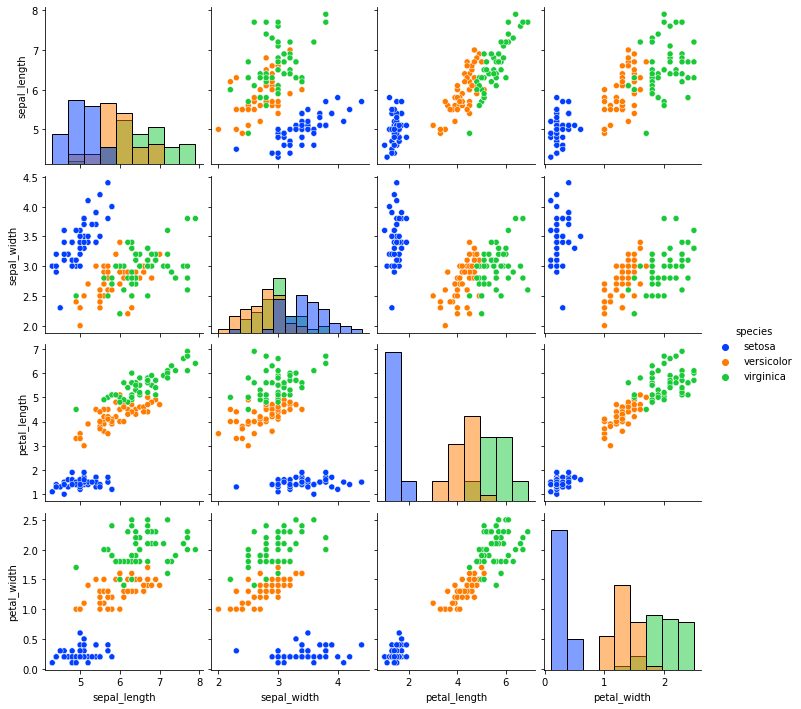

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")
print(iris.head())
y = iris.species
X = iris.drop('species',axis=1)
sns.pairplot(iris, hue="species",palette="bright", diag_kind = "hist")

## Liniowo separowalne dane

#### Ograniczamy się dziś do dwóch cech i dwóch klas irysów. 

W pierwszej części ćwiczeń chciałabym wizualizować nasze wyniki, by złapać podstawową intuicję za działaniem SVM. Wyłącznie w celu ułatwienia wizualizacji ograniczymy się więc na razie do dwóch cech i dwóch klas. Np. weźmy cechy petal_width, petal_length oraz klasy Setosa i Versicolor.
    

In [3]:
data = iris[(iris['species']!='virginica')]
data = data.drop(['sepal_length','sepal_width'], axis=1)
data.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


Zmienimy teraz nazwy kategorii na liczby i zwizualizujemy, na czym będziemy dzisiaj pracować :)

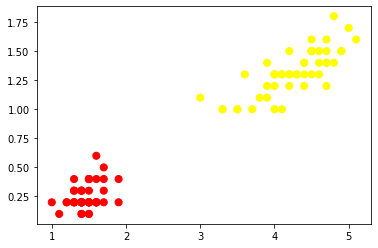

In [4]:
data = data.replace('setosa', 0)
data = data.replace('versicolor', 1)
X = data.iloc[:,0:2] # the 'iloc' to właśnie konsekwencja korzystania z pandas. Gdyby data było zwykłym arrayem, starczyłoby data[:,0:2] :)
y = data['species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

Czas na trening modelu. Jak może już zauważyliście, ten etap w sklearn jest bardzo podobny niezależnie od modelu. Analogicznie wyglądał dla naiwnego Bayesa!

In [5]:
from sklearn.svm import SVC 
import sklearn.model_selection as model_selection
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Po raz pierwszy na ćwiczeniach dotykamy tematu regularyzacji modelu. Regularyzacja to ogólnie rzecz biorąc każda technika, która zwiększa zdolność generalizacji modelu. Będziemy o tym mówić szczególnie w kontekście sieci neuronowych. Tutaj takim parametrem regularyzacyjnym jest parametr C, regulujący koszt "naruszania" marginesów zbudowanych przez model. Im mniejszy parametr C, tym mniejszy koszt i większa szansa, że jakiś

#### Możemy zwizualizować wekstory wspierające, na których zbudowany jest nasz model

[[1.9 0.4]
 [3.  1.1]]


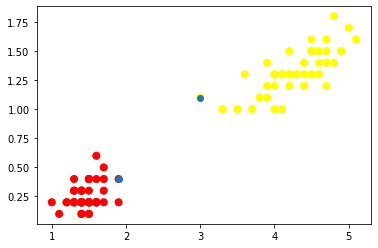

In [6]:
print(model.support_vectors_)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

#### Narysujmy te dane

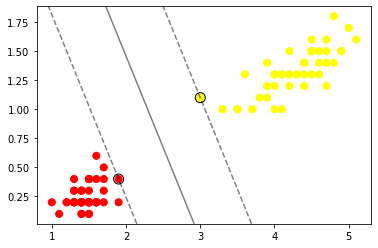

In [7]:
ax = plt.gca()

# Rysujemy wszystkie dane treningowe
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

# Budujemy siatkę (meshgrid)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Rysujemy funkcję decyzyjną nauczonego modelu
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Dorysowywujemy wektory wspierające
support_vector1 = model.support_vectors_[:, 0]
support_vector2 = model.support_vectors_[:, 1]
ax.scatter(support_vector1, support_vector2, s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

#### Co się stanie z wyznaczoną funkcją decyzji jak usuniemy część danych uczących?

Korzystając z kawałka już napisanego kodu, który buduje Wam dane uczące biorąc wszystkie dane z żółtej klasy versicolor i losuje 70% danych z czerwonej klasy setosa, przetrenujcie kilka razy SVM, rysując funkcję decyzji (jak wyżej). Jakie macie wnioski?

PS. Najlepiej zróbcie sobie z tego funkcję z argumentami: X, y, kernel, C, gamma, bo będziecie tego używać jeszcze kilka razy :)

In [8]:
def trainSVM_and_visualize(X, Y, kernel, C_value=1.0, gamma_value='scale', panda = True):
  # Trening modelu
  model = SVC(kernel=kernel, C = C_value)
  model.fit(X, y)
  # Deklarujemy obiekt wykres
  ax = plt.gca()
  if panda == True:
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
  if panda == False:
    plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'autumn')
  plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])
  # Budujemy siatkę (meshgrid)
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  # Rysujemy funkcję decyzyjną nauczonego modelu
  Z = model.decision_function(xy).reshape(XX.shape)
  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
  # Dorysowywujemy wektory wspierające
  support_vector1 = model.support_vectors_[:, 0]
  support_vector2 = model.support_vectors_[:, 1]
  #ax.scatter(support_vector1, support_vector2, s=100,
  #         linewidth=1, facecolors='none', edgecolors='k')
  plt.show()
  return Z

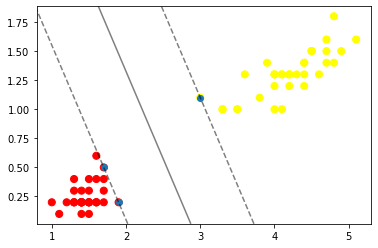

array([[-2.44513501e+00, -2.39459766e+00, -2.34406032e+00,
        -2.29352297e+00, -2.24298563e+00, -2.19244828e+00,
        -2.14191094e+00, -2.09137359e+00, -2.04083625e+00,
        -1.99029890e+00, -1.93976156e+00, -1.88922421e+00,
        -1.83868687e+00, -1.78814953e+00, -1.73761218e+00,
        -1.68707484e+00, -1.63653749e+00, -1.58600015e+00,
        -1.53546280e+00, -1.48492546e+00, -1.43438811e+00,
        -1.38385077e+00, -1.33331342e+00, -1.28277608e+00,
        -1.23223873e+00, -1.18170139e+00, -1.13116404e+00,
        -1.08062670e+00, -1.03008935e+00, -9.79552007e-01],
       [-2.26213194e+00, -2.21159459e+00, -2.16105725e+00,
        -2.11051990e+00, -2.05998256e+00, -2.00944521e+00,
        -1.95890787e+00, -1.90837052e+00, -1.85783318e+00,
        -1.80729583e+00, -1.75675849e+00, -1.70622114e+00,
        -1.65568380e+00, -1.60514645e+00, -1.55460911e+00,
        -1.50407176e+00, -1.45353442e+00, -1.40299707e+00,
        -1.35245973e+00, -1.30192238e+00, -1.25138504e+

In [9]:
    red_sample = data.sample(frac=0.7)
    X = red_sample.iloc[:,0:2]
    y = red_sample['species']
    trainSVM_and_visualize(X, y, 'linear',1, True)

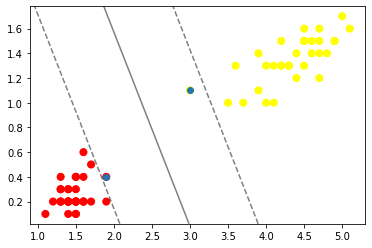

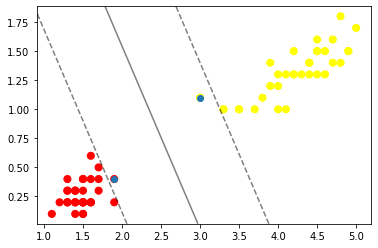

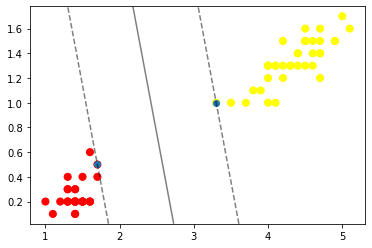

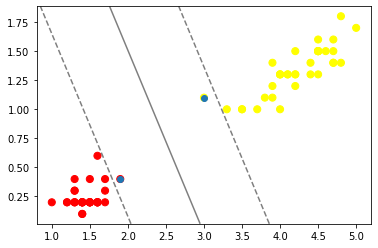

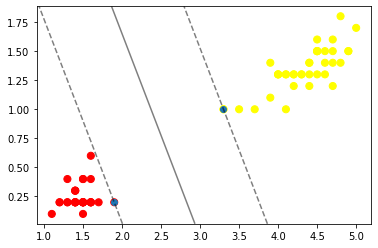

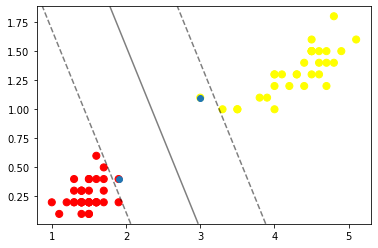

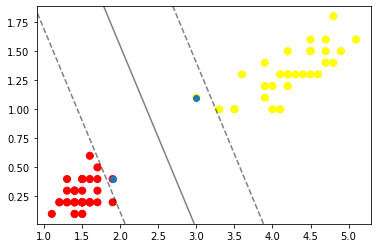

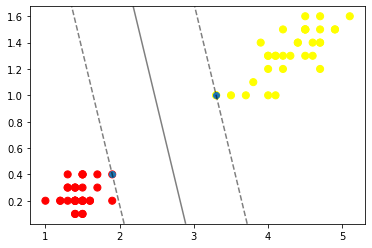

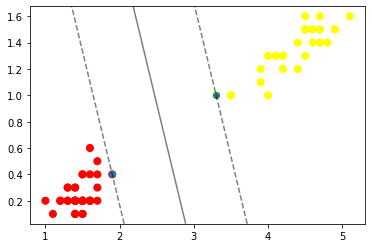

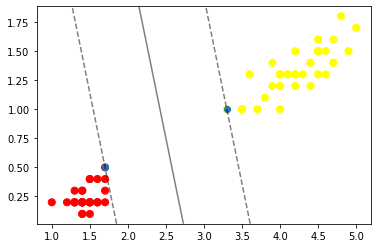

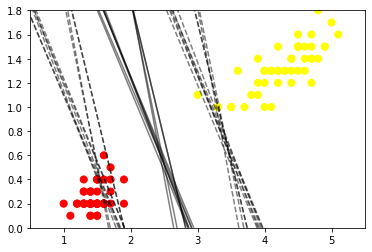

In [10]:
# Przygotowanie danych uczących i nauczenie modelu
n = 10
Z= []
for i in range(n):
  red_sample = data.sample(frac=0.7)
  X = red_sample.iloc[:,0:2]
  y = red_sample['species']
  Z.append(trainSVM_and_visualize(X, y, 'linear'))


# Zbiorczy wykres wszystkich prostych z wektorami
red_sample = data.sample(frac=1)
X = red_sample.iloc[:,0:2]
y = red_sample['species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

ax = plt.gca()
xlim = [0.5, 5.5]
ylim = [0, 1.8]
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Rysujemy funkcję decyzyjną nauczonego modelu
for i in range(len(Z)):
  ax.contour(XX, YY, Z[i], colors='k', levels=[-1, 0, 1], alpha=0.5,
          linestyles=['--', '-', '--'])
plt.show()


Po usunięciu części danych widać pewne wariacje w parametrach nauczonego modelu dla 10 różnych prób. Niemniej jednak, większość linii decyzyjnych jest do siebie prawie równoległa, co wskazuje, że różne próbkowanie (70% danych) daje bardzo zbliżone wyniki.

## Liniowo nieseparowalne dane

Aby zwizualizować super moc SVM na danych nieseparowalnych liniowo, to zaczniemy od sztucznie wygenerowanych danych.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


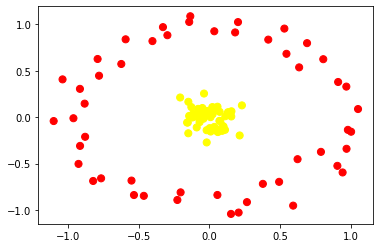

In [11]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

#### Wytrenujcie na takich danych SVM z liniowym kernelem i zwizualizujcie wyniki
Proponuję użyć do tego tej samej funkcji co stworzyliście ostatnio, ALE dodajcie dodatkowy argument opcjonalny np. 'panda = True' od którego zależeć będzie linijka z plotowaniem wszystkich danych (czyli plt.scatter...). Do tej pory korzystaliście z danych pandowych, więc używaliście 'iloc', teraz wracamy do array'ów zwykłych, więc trzeba iloca się pozbyć :) proponuję zrobić tam if'a.

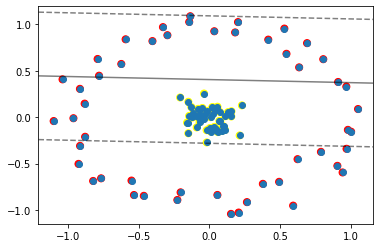

array([[ 2.32147656e+00,  2.20380961e+00,  2.08614265e+00,
         1.96847570e+00,  1.85080874e+00,  1.73314179e+00,
         1.61547483e+00,  1.49780788e+00,  1.38014092e+00,
         1.26247397e+00,  1.14480701e+00,  1.02714006e+00,
         9.09473101e-01,  7.91806146e-01,  6.74139191e-01,
         5.56472235e-01,  4.38805280e-01,  3.21138325e-01,
         2.03471370e-01,  8.58044143e-02, -3.18625409e-02,
        -1.49529496e-01, -2.67196451e-01, -3.84863407e-01,
        -5.02530362e-01, -6.20197317e-01, -7.37864273e-01,
        -8.55531228e-01, -9.73198183e-01, -1.09086514e+00],
       [ 2.31754921e+00,  2.19988225e+00,  2.08221530e+00,
         1.96454834e+00,  1.84688139e+00,  1.72921443e+00,
         1.61154748e+00,  1.49388052e+00,  1.37621357e+00,
         1.25854661e+00,  1.14087966e+00,  1.02321270e+00,
         9.05545746e-01,  7.87878791e-01,  6.70211835e-01,
         5.52544880e-01,  4.34877925e-01,  3.17210970e-01,
         1.99544014e-01,  8.18770591e-02, -3.57898962e-

In [12]:
trainSVM_and_visualize(X, y, 'linear', panda = False)

### Co zrobi nam za to SVM jak ustalimy kernel np. gaussowski?
Możemy wyobrazić sobie, że te dane są nieźle separowalne, jak zmapujemy je odpowiednią funkcją w wyższy wymiar. Np:

Text(0.5, 0, 'r')

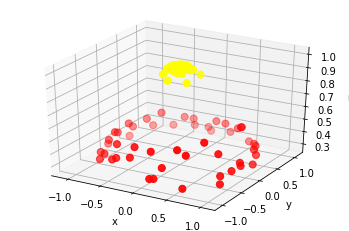

In [13]:
from mpl_toolkits import mplot3d

# wchodzimy w 3D za pomocą RBF scentrowanym w środku żółtego bloba
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

Teraz zrobiliśmy to ręcznie, gdybyśmy chcieli podejść do tego na poważnie, to musielibyśmy zastanowić się nad optymalnym mapowaniem, które najlepiej dzieli klasy, a także nad wydajnością numeryczną takiego mapowania. Wszystko to siedzi w środku SVM, z naszej strony wymaga ona tylko zastanowienia się jakiego kernela chcemy użyć. Polecam wizualizacje pod [tym linkiem](https://www.kaggle.com/joparga3/3-visualising-how-different-kernels-in-svms-work), które dają fajną intuicję czego po różnych kernelach oczekiwać. Ostatecznie jednak warto sprawdzić samą funkcję mapującą.

### Użyjcie teraz kernela = 'rbf'

In [14]:
def trainSVM_and_visualize(X, Y, kernel, C_value=1.0, gamma_value = 'scale', panda = True):
  # Trening modelu
  model = SVC(kernel=kernel, C = C_value, gamma = gamma_value)
  model.fit(X, y)
  # Deklarujemy obiekt wykres
  ax = plt.gca()
  if panda == True:
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
  if panda == False:
    plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'autumn')
  plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])
  # Budujemy siatkę (meshgrid)
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  # Rysujemy funkcję decyzyjną nauczonego modelu
  Z = model.decision_function(xy).reshape(XX.shape)
  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
  # Dorysowywujemy wektory wspierające
  support_vector1 = model.support_vectors_[:, 0]
  support_vector2 = model.support_vectors_[:, 1]
  #ax.scatter(support_vector1, support_vector2, s=100,
  #         linewidth=1, facecolors='none', edgecolors='k')
  plt.show()

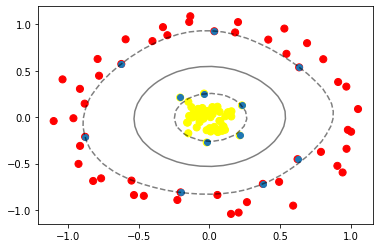

In [15]:
trainSVM_and_visualize(X, y, 'rbf', panda = False)

## Zadanie na dzisiaj
Czym są parametry C i gamma w definicji modelu SVM? Proszę znaleźć i opisać za co odpowiadają. Ponadto zadaniem na dzisiaj będzie dobranie optymalnych C i gamma (hiperparametrów). Zanim wyrobi się intuicję czego i jak szukać, można stosować (drogie) podejście systematyczne. Czyli wykonujemy wiele treningów dla ustalonych wartości C i gamma, po czym wyliczamy metryki klasyfikacji dla każdej kombinacji i wizualizujemy najlepsze. To jest zadanie na dzisiaj :)

###Parametr C

Determinuje dozwolony margines w algorytmie SVM kosztem precyzji modelu. Jeżeli C jest duże, będzie prowadzić to do przyjęcia małych marginesów, jednak większej precyzji modelu. Jeżeli zaś C będzie małe, prowadzić będzie to niższej precyzji z większymi marginesami.

###Parametr gamma

Określa on wpływ jednego przypadku uczącego na całość przestrzeni. Można go rozumieć jako odwrotność promienia oddziaływania na przestrzeń parametrów. Jeżeli jest on bardzo mały, model będzie "zamykał" przypadki z danej klasy na ograniczonym obszarze. Z kolei jeśli będzie on za duży, trudno będzie otrzymać bardziej precyzyjne krzywizny w przestrzeni parametrów.

### Będziecie pracować znów na iryskach i znów na dwóch cechach (żeby ułatwić wizualizację), ale tym razem weźmy trzy klasy.

In [16]:
iris = sns.load_dataset("iris")
print(iris.head())

y = iris.species
y = y.replace('setosa', 0)
y = y.replace('versicolor', 1)
y = y.replace('virginica', 2)

X = iris.drop('species',axis=1)
X = X.drop(['sepal_length','sepal_width'], axis=1)
X.head()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Koniec z czystą wizualizacją, teraz na poważnie dobieramy hiperparametry i oceniamy jakość klasyfikacji. Potrzebujemy podziału na dane treningowe i testowe! (np. za pomocą *train_test_split* z *sklearn.model_selection*)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from matplotlib.colors import Normalize

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

Mając taki podział danych możemy dopasować model SVM do części uczącej. Mamy teraz jednak trzy klasy, a decision_function rysuje się dla jednej klasy vs. pozostałe osobno (mielibyśmy chaotyczny rysunek), więc lepiej zmodyfikować część wizualizacyjną i zamiast tego robić predykcje dla każdego elementu mesha (tak jak na dwóch zajęciach temu, czyli Bayes na iryskach).

In [23]:
def trainSVM_and_visualize_multiclass(X_train, Y_train, kernel, C_value, gamma_value, panda = True):
  X = X_train
  y = Y_train
  # Trening modelu
  model = SVC(kernel=kernel, C = C_value, gamma = gamma_value)
  model.fit(X, y)
  # Deklaracja obiektu wykres
  ax = plt.gca()

  if panda == True:
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
  if panda == False:
    plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'autumn')

  # Budujemy siatkę (meshgrid)
  h = 0.02 # krok w meshu
  x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
  y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Robimy predykcję dla każdego elementu meshgridu
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  # Predykcje zmieniamy w kolory
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)

  # Dorysowywujemy wektory wspierające

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()

In [30]:

def trainSVM_multiclass(X_train, Y_train, kernel, C_value, gamma_value, panda = True):
  X = X_train
  y = Y_train
  # Trening modelu
  model = SVC(kernel=kernel, C = C_value, gamma = gamma_value)
  model.fit(X, y)

  # Budujemy siatkę (meshgrid)
  h = 0.02 # krok w meshu
  x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
  y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Robimy predykcję dla każdego elementu meshgridu
  Z = model.predict(X)
  
  accur = accuracy_score(y,Z) # dokładność
  
  return [accur, C_value, gamma_value]

def optimum_searching(C_start, C_end, gamma_start, gamma_end, X_train, Y_train, kernel):
  rangeC = np.logspace(np.log2(C_start),np.log2(C_end), 20, base=2)
  rangeGamma = np.logspace(np.log2(gamma_start),np.log2(gamma_end), 20, base=2)
  

  #uczymy model dla bardzo różnych parametrów gamma i C, zwracamy listę tych parametrów
  accuracy_list = []
  for C in rangeC:
    for gamma in rangeGamma:
      accuracy_list.append(trainSVM_multiclass(X_train, y_train, kernel='rbf', C_value = C, gamma_value = gamma))

  ### PLOTTOWANIE WYNIKOW W ZALEZNOSCI OD GAMMA I C ###

  class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

  plt.figure(figsize=(10,10))
  plt.imshow(acc[:,0].reshape(20,20), interpolation='nearest', cmap=plt.cm.hot, aspect='auto', norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
  plt.ylabel('gamma')
  plt.xlabel('C')
  plt.colorbar()

  plt.xticks(np.arange(len(rangeC)), np.round(rangeC,2), rotation=45)
  plt.yticks(np.arange(len(rangeGamma)), np.round(rangeGamma,2))

  plt.show()

  return accuracy_list
  


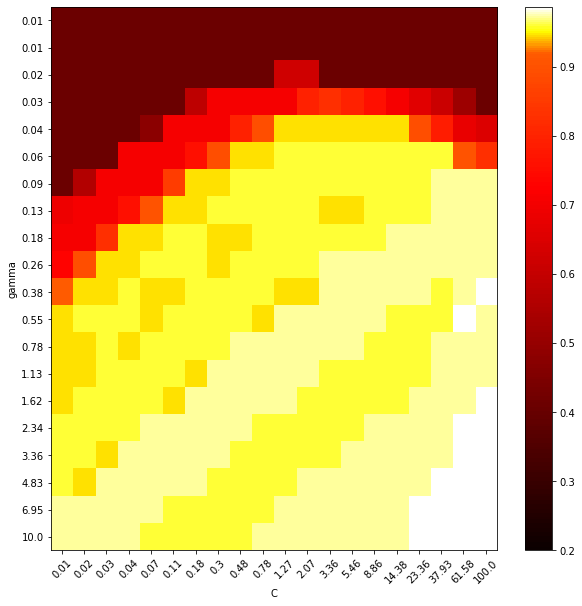

In [31]:
acc = np.asarray(optimum_searching(0.01, 100, 0.01, 10, X_train, y_train, 'rbf'))

In [54]:
acc[np.argmax(acc[:,0])]

array([ 0.98666667,  1.27427499, 10.        ])

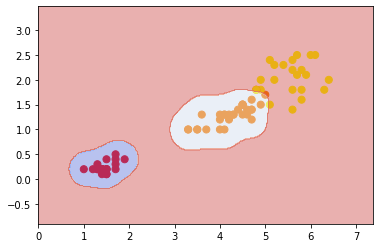

accuracy:  0.99 C:  1.27 gamma:  10.0


In [58]:
###szukamy maksimum jakości klasyfikacji w powyższej siatce parametrów i plottujemy je
def visualize_maximum(accuracy, X_train, Y_train, kernel):
  opt_values = np.round(accuracy[np.argmax(accuracy[:,0])],2)
  trainSVM_and_visualize_multiclass(X_train, Y_train, kernel, opt_values[1], opt_values[2], panda = True)
  print('accuracy: ', opt_values[0],'C: ', opt_values[1], 'gamma: ', opt_values[2])

visualize_maximum(acc, X_train,y_train, 'rbf')
  


Teraz możemy zastosować miary jakości klasyfikacji.

###Odpowiedź
Przestrzeń parametrów precyzji wykazuje się niewielką zmiennością. Dla dużego przedziału wartości C i gamma osiągamy bardzo dużą precyzję (sięgającą 99%, czyli jest jeden niepewny przypadek). Postępując wg tego algorytmu dostajemy jednak mocno przeuczony model, który wg powyższego rysunku większość przypadków będzie klasyfikował do klasy 3. Wynika to z prawdopodobnie z dużej wartości gammy, która w tym przypadku spowalnia generalizację. 

###Dodatek
Sukcesywnie zmniejszamy wartość gammy w taki sposób, by model trafnie klasyfikował dane oraz jednocześnie lepiej je generalizował przy niewielkiej stracie precyzji.

gamma = 10

gamma:  10


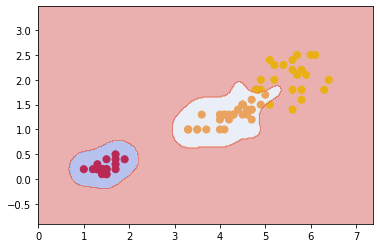

gamma:  5


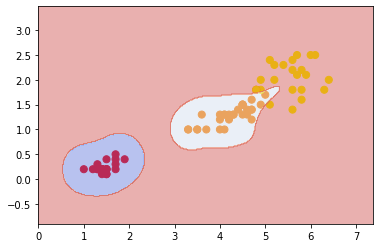

gamma:  1


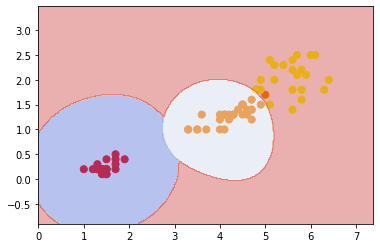

gamma:  0.5


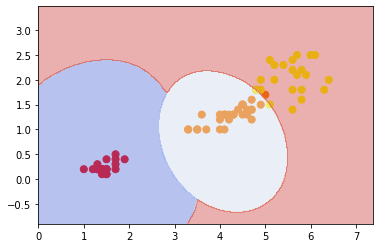

gamma:  0.1


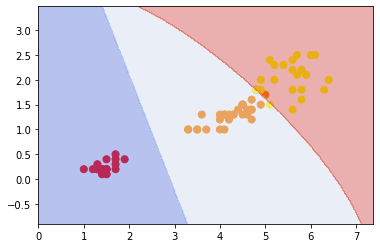

gamma:  0.05


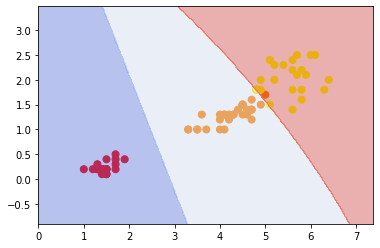

In [76]:
gammas = [10,5,1,0.5,0.1, 0.05]
for i,j in enumerate(gammas):
  print('gamma: ', j)
  trainSVM_and_visualize_multiclass(X_train, y_train, 'rbf', 40, j, panda = True)

Z powyższych rysunków możemy wnioskować, że klasy o niewielkiej wariancji cech (np. klasa 1) są bardzo czułe na dużą wartość gammy, która "tłumi" ich wpływ na przestrzeń parametrów cech. Prowadzi to do ich zamknięcia w małych obszarach na rzecz klasy o większym rozrzucie cech (klasa 3).

#### Proszę napisać kod, który
* skanuje przestrzeń (C, gamma): C w zakresie od 0.1 do 100, gamma w zakresie od 0.1 do 10. Do wygenerowania zakresu ze skalą logarytmiczną można wykorzystać np. takie polecenie: <tt>zakresC = np.logspace(np.log2(0.1),np.log2(100), 8, base=2)</tt>
* znajduje najlepsze parametry
* rysuje podział przestrzeni dla najlepszych parametrów.

Którą miarę jakości będziecie maksymalizować?

Stąd możecie czerpać inspirację: [link](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html).